In [156]:
import pandas as pd

# Load the NBA merged data
nba_data = pd.read_csv('nba_merged_data.csv')
# Drop unnecessary columns
nba_data = nba_data.loc[:, ~nba_data.columns.str.contains('_RANK$')]

def categorize_playoff_type(wins):
    if wins == 0:
        return 0
    elif 1 <= wins <= 3:
        return 1
    elif 4 <= wins <= 7:
        return 2
    elif 8 <= wins <= 11:
        return 3
    elif 12 <= wins <= 15:
        return 4
    elif wins == 16:
        return 5

nba_data['PLAYOFF_WINS'] = nba_data['PLAYOFF_WINS'].apply(categorize_playoff_type).apply(pd.Series).astype('category')

# change data type of WL to binary 
nba_data['WL'] = nba_data['WL'].map({'W': 1, 'L': 0})
nba_data['WL'] = nba_data['WL'].astype('category')

# Unnecessary columns for model
columns_to_exclude = [
    'SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
    'GAME_ID', 'GAME_DATE', 'MATCHUP', 'MIN',
    'AVAILABLE_FLAG'
]




In [157]:
nba_data.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
0,2023-24,1610612737,ATL,Atlanta Hawks,22301188,2024-04-14T00:00:00,ATL @ IND,0,48.0,39,...,0.425,0.159,0.506,0.570,108.6,107.00,89.17,107,0.351,0
1,2023-24,1610612737,ATL,Atlanta Hawks,22301178,2024-04-12T00:00:00,ATL @ MIN,0,48.0,40,...,0.525,0.149,0.494,0.525,102.9,102.00,85.00,101,0.394,0
2,2023-24,1610612737,ATL,Atlanta Hawks,22301159,2024-04-10T00:00:00,ATL vs. CHA,0,48.0,43,...,0.549,0.184,0.634,0.640,98.9,98.00,81.67,98,0.495,0
3,2023-24,1610612737,ATL,Atlanta Hawks,22301147,2024-04-09T00:00:00,ATL vs. MIA,0,58.0,45,...,0.570,0.145,0.442,0.466,94.5,91.86,76.55,110,0.453,0
4,2023-24,1610612737,ATL,Atlanta Hawks,22301130,2024-04-06T00:00:00,ATL @ DEN,0,48.0,37,...,0.444,0.152,0.494,0.551,105.4,105.00,87.50,105,0.366,0


In [158]:
# used to print the structure of the dictionary
def print_dict_structure(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + f"{key}: {type(value).__name__}")
        if isinstance(value, dict):
            print_dict_structure(value, indent + 1)

In [159]:
seasons = nba_data['SEASON_YEAR'].unique()
teams = nba_data['TEAM_NAME'].unique()

# Create a dictionary where each season maps to another dictionary with teams as keys and filtered DataFrame as values
seasons_dict = {
    season: {
        team: nba_data[(nba_data['SEASON_YEAR'] == season) & (nba_data['TEAM_NAME'] == team)].drop(columns=columns_to_exclude)
        for team in teams
    }
    for season in seasons
}

print("seasons_dict structure:")
print_dict_structure(seasons_dict)




seasons_dict structure:
2023-24: dict
  Atlanta Hawks: DataFrame
  Boston Celtics: DataFrame
  Brooklyn Nets: DataFrame
  Charlotte Hornets: DataFrame
  Chicago Bulls: DataFrame
  Cleveland Cavaliers: DataFrame
  Dallas Mavericks: DataFrame
  Denver Nuggets: DataFrame
  Detroit Pistons: DataFrame
  Golden State Warriors: DataFrame
  Houston Rockets: DataFrame
  Indiana Pacers: DataFrame
  LA Clippers: DataFrame
  Los Angeles Lakers: DataFrame
  Memphis Grizzlies: DataFrame
  Miami Heat: DataFrame
  Milwaukee Bucks: DataFrame
  Minnesota Timberwolves: DataFrame
  New Orleans Pelicans: DataFrame
  New York Knicks: DataFrame
  Oklahoma City Thunder: DataFrame
  Orlando Magic: DataFrame
  Philadelphia 76ers: DataFrame
  Phoenix Suns: DataFrame
  Portland Trail Blazers: DataFrame
  Sacramento Kings: DataFrame
  San Antonio Spurs: DataFrame
  Toronto Raptors: DataFrame
  Utah Jazz: DataFrame
  Washington Wizards: DataFrame
  Los Angeles Clippers: DataFrame
2022-23: dict
  Atlanta Hawks: Data

In [160]:
seasons_dict['2023-24']['Atlanta Hawks'].tail()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
77,1,46,92,0.500,9,32,0.281,29,32,0.906,...,0.606,0.191,0.549,0.613,112.6,110.5,92.08,110,0.542,0
78,1,48,86,0.558,14,30,0.467,17,18,0.944,...,0.465,0.113,0.640,0.676,100.8,98.0,81.67,97,0.591,0
79,1,47,93,0.505,15,37,0.405,18,22,0.818,...,0.546,0.163,0.586,0.618,106.2,103.0,85.83,104,0.618,0
80,0,42,87,0.483,12,32,0.375,24,30,0.800,...,0.490,0.130,0.552,0.599,105.8,107.0,89.17,108,0.495,0
81,0,39,93,0.419,5,29,0.172,27,33,0.818,...,0.452,0.115,0.446,0.512,106.0,104.0,86.67,104,0.451,0


In [161]:
nba_data[(nba_data['SEASON_YEAR'] == '2023-24') & (nba_data['TEAM_NAME'] == 'Atlanta Hawks')].tail()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
77,2023-24,1610612737,ATL,Atlanta Hawks,22300117,2023-11-01T00:00:00,ATL vs. WAS,1,48.0,46,...,0.606,0.191,0.549,0.613,112.6,110.5,92.08,110,0.542,0
78,2023-24,1610612737,ATL,Atlanta Hawks,22300104,2023-10-30T00:00:00,ATL vs. MIN,1,48.0,48,...,0.465,0.113,0.640,0.676,100.8,98.0,81.67,97,0.591,0
79,2023-24,1610612737,ATL,Atlanta Hawks,22300097,2023-10-29T00:00:00,ATL @ MIL,1,48.0,47,...,0.546,0.163,0.586,0.618,106.2,103.0,85.83,104,0.618,0
80,2023-24,1610612737,ATL,Atlanta Hawks,22300079,2023-10-27T00:00:00,ATL vs. NYK,0,48.0,42,...,0.490,0.130,0.552,0.599,105.8,107.0,89.17,108,0.495,0
81,2023-24,1610612737,ATL,Atlanta Hawks,22300063,2023-10-25T00:00:00,ATL @ CHA,0,48.0,39,...,0.452,0.115,0.446,0.512,106.0,104.0,86.67,104,0.451,0


In [162]:
for season, teams_data in seasons_dict.items():
    for team, df in teams_data.items():
        df['GAME_NUMBER'] = range(1, len(df) + 1)

In [163]:
seasons_dict['2023-24']['Atlanta Hawks'].head()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
0,0,39,89,0.438,12,36,0.333,25,27,0.926,...,0.159,0.506,0.570,108.6,107.00,89.17,107,0.351,0,1
1,0,40,90,0.444,9,30,0.300,17,25,0.680,...,0.149,0.494,0.525,102.9,102.00,85.00,101,0.394,0,2
2,0,43,82,0.524,18,40,0.450,10,16,0.625,...,0.184,0.634,0.640,98.9,98.00,81.67,98,0.495,0,3
3,0,45,113,0.398,10,46,0.217,11,14,0.786,...,0.145,0.442,0.466,94.5,91.86,76.55,110,0.453,0,4
4,0,37,87,0.425,12,37,0.324,24,29,0.828,...,0.152,0.494,0.551,105.4,105.00,87.50,105,0.366,0,5


In [164]:
seasons_dict['2023-24']['Atlanta Hawks'].columns

# Sum: WL, FGM, FGA, FG3M, FG3A, FTM, FTA, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS
# Dont touch: PLAYOFF_WINS, GAME_NUMBER




Index(['WL', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'E_OFF_RATING', 'OFF_RATING',
       'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE',
       'PLAYOFF_WINS', 'GAME_NUMBER'],
      dtype='object')

In [214]:
import pandas as pd

rolling_aggregations = {}

for season, teams in seasons_dict.items():
    rolling_aggregations[season] = {}
    for team, data in teams.items():
        df = data.copy()
        for column in df.columns:
            if column not in ['PLAYOFF_WINS', 'GAME_NUMBER', 'WL']:
                df[column] = data[column].expanding().mean().round(3)
            elif column == 'WL':
                df[column] = data[column].expanding().sum().round()

        rolling_aggregations[season][team] = df

In [215]:
rolling_aggregations['2023-24']['Atlanta Hawks'].tail(5)

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
77,34.0,42.987,92.628,0.465,13.833,38.000,0.365,18.385,23.115,0.792,...,0.134,0.540,0.576,102.528,100.759,83.966,101.615,0.480,0,78
78,35.0,43.051,92.544,0.466,13.835,37.899,0.366,18.367,23.051,0.794,...,0.133,0.541,0.577,102.506,100.724,83.937,101.557,0.481,0,79
79,36.0,43.100,92.550,0.467,13.850,37.888,0.366,18.362,23.038,0.794,...,0.134,0.542,0.578,102.553,100.752,83.960,101.588,0.483,0,80
80,36.0,43.086,92.481,0.467,13.827,37.815,0.367,18.432,23.123,0.794,...,0.134,0.542,0.578,102.593,100.830,84.025,101.667,0.483,0,81
81,36.0,43.037,92.488,0.466,13.720,37.707,0.364,18.537,23.244,0.794,...,0.133,0.541,0.577,102.634,100.868,84.057,101.695,0.483,0,82


In [216]:
rolling_avg_games_dict = {}

for season, teams in rolling_aggregations.items():
    rolling_avg_games_dict[season] = {}

    total_df = pd.DataFrame()
    
    for team, data in teams.items():
        total_df = pd.concat([total_df, data], ignore_index=True)

    for i in range(1, 83):
        rolling_avg_games_dict[season][f'GAME_{i}'] = (total_df[total_df['GAME_NUMBER'] == i])

print_dict_structure(rolling_avg_games_dict)




2023-24: dict
  GAME_1: DataFrame
  GAME_2: DataFrame
  GAME_3: DataFrame
  GAME_4: DataFrame
  GAME_5: DataFrame
  GAME_6: DataFrame
  GAME_7: DataFrame
  GAME_8: DataFrame
  GAME_9: DataFrame
  GAME_10: DataFrame
  GAME_11: DataFrame
  GAME_12: DataFrame
  GAME_13: DataFrame
  GAME_14: DataFrame
  GAME_15: DataFrame
  GAME_16: DataFrame
  GAME_17: DataFrame
  GAME_18: DataFrame
  GAME_19: DataFrame
  GAME_20: DataFrame
  GAME_21: DataFrame
  GAME_22: DataFrame
  GAME_23: DataFrame
  GAME_24: DataFrame
  GAME_25: DataFrame
  GAME_26: DataFrame
  GAME_27: DataFrame
  GAME_28: DataFrame
  GAME_29: DataFrame
  GAME_30: DataFrame
  GAME_31: DataFrame
  GAME_32: DataFrame
  GAME_33: DataFrame
  GAME_34: DataFrame
  GAME_35: DataFrame
  GAME_36: DataFrame
  GAME_37: DataFrame
  GAME_38: DataFrame
  GAME_39: DataFrame
  GAME_40: DataFrame
  GAME_41: DataFrame
  GAME_42: DataFrame
  GAME_43: DataFrame
  GAME_44: DataFrame
  GAME_45: DataFrame
  GAME_46: DataFrame
  GAME_47: DataFrame
  GAME_4

In [217]:
rolling_avg_games_dict['2023-24']['GAME_1'].head(1)

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
0,0.0,39.0,89.0,0.438,12.0,36.0,0.333,25.0,27.0,0.926,...,0.159,0.506,0.57,108.6,107.0,89.17,107.0,0.351,0,1


In [218]:
rolling_aggregations['2023-24']['Atlanta Hawks'].head(1)

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
0,0.0,39.0,89.0,0.438,12.0,36.0,0.333,25.0,27.0,0.926,...,0.159,0.506,0.57,108.6,107.0,89.17,107.0,0.351,0,1


# Data Analysis

In [282]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical


# split data into x and y
def XYSplit(df):
    x = df.drop(columns=columns_to_exclude)
    y = df['PLAYOFF_WINS']
    return {"x": x, "y": y}

def getModel(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))  # Output layer with Softmax activation
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical cross-entropy
    return model




In [291]:
list(rolling_avg_games_dict.keys())[1:]

['2022-23',
 '2021-22',
 '2020-21',
 '2019-20',
 '2018-19',
 '2017-18',
 '2016-17',
 '2015-16',
 '2014-15']

In [297]:
train_years = list(rolling_avg_games_dict.keys())[:-1]
test_year = '2023-24'

model = getModel(len(rolling_avg_games_dict['2014-15']['GAME_1'].columns) - 1, 6)  # 6 classes for playoff wins
testing_Accuracy = []


for train_year in train_years:
    print(f"Training on {train_year} and testing on {test_year}")
    train_data = rolling_avg_games_dict[train_year]
    test_data = rolling_avg_games_dict[test_year]

    for game, data in train_data.items():
        print(game)

        if (data.empty):
            break

        x_train = data.drop(columns=['PLAYOFF_WINS'])
        y_train = data['PLAYOFF_WINS']
        y_train = pd.get_dummies(y_train)

        x_test = test_data[game].drop(columns=['PLAYOFF_WINS'])
        y_test = test_data[game]['PLAYOFF_WINS']
        y_test = pd.get_dummies(y_test)
        
        # Train the model

        model.fit(x_train, y_train, epochs=max(1, int(int(game.split("_")[1]) / 10)), batch_size=30, verbose=1)

        # Evaluate the model on the testing set
        test_acc = model.evaluate(x_test, y_test, verbose=0)
        testing_Accuracy.append(test_acc[1])


Training on 2023-24 and testing on 2023-24
GAME_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - accuracy: 0.0333 - loss: 52.8281
GAME_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1000 - loss: 35.5024
GAME_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1333 - loss: 24.9111
GAME_4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2000 - loss: 17.5710
GAME_5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0667 - loss: 8.2295
GAME_6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 2.8317
GAME_7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5333 - loss: 6.0889
GAME_8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5333 - loss: 7.8916
GAME_9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5333 - loss: 8.3564
GAME_10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5333 - loss: 7.9351
GAME_11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3667 - loss: 7.8840
GAME_12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4667 - loss: 6.6233
G

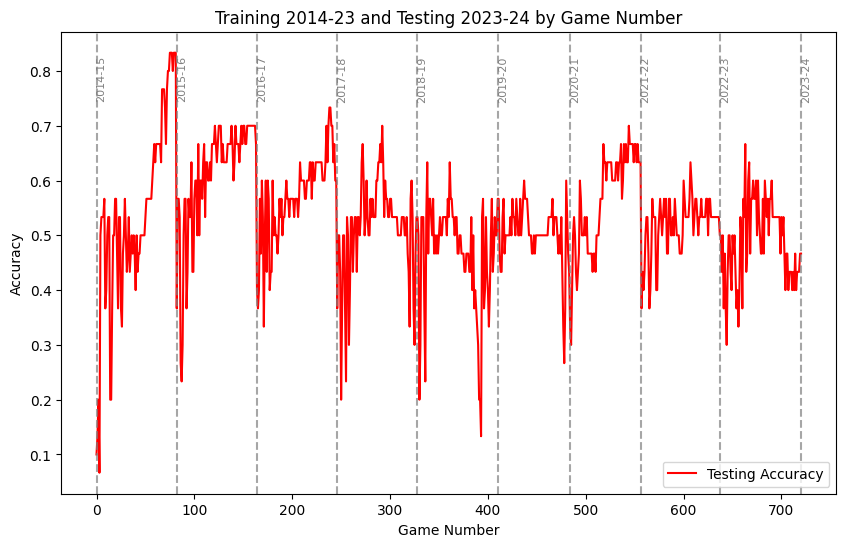

In [317]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(testing_Accuracy, label='Testing Accuracy', color='red')

# Add vertical gray lines for the specified games
highlighted_games = [0, 82, 164, 246, 328, 410, 477+7, 549+7, 630+7, 712+8]
labels = ['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']

for game, label in zip(highlighted_games, labels):
    plt.axvline(x=game, color='gray', linestyle='--', alpha=0.7)
    plt.text(game, plt.ylim()[1] * 0.95, label, rotation=90, verticalalignment='top', fontsize=8, color='gray')

plt.title('Training 2014-23 and Testing 2023-24 by Game Number')
plt.xlabel('Game Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

In [311]:
seasons_dict['2022-23']['Atlanta Hawks'].tail()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
2537,1,55,97,0.567,12,29,0.414,14,18,0.778,...,0.071,0.629,0.648,100.8,98.5,82.08,98,0.631,1,78
2538,1,45,91,0.495,8,22,0.364,20,25,0.800,...,0.120,0.538,0.578,104.3,99.0,82.50,100,0.570,1,79
2539,0,39,95,0.411,8,35,0.229,23,28,0.821,...,0.119,0.453,0.508,103.3,101.0,84.17,101,0.424,1,80
2540,1,40,89,0.449,13,31,0.419,15,16,0.938,...,0.167,0.522,0.562,103.1,101.5,84.58,102,0.567,1,81
2541,1,45,90,0.500,7,25,0.280,20,24,0.833,...,0.085,0.539,0.582,105.6,106.0,88.33,106,0.572,1,82


In [ ]:
[82, 164, 246, 328, 410, 477, 549, 630, 712]

Index(['WL', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'E_OFF_RATING', 'OFF_RATING',
       'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE',
       'PLAYOFF_WINS', 'GAME_NUMBER'],
      dtype='object')